In [1]:
import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
hf = h5py.File("C:\OOP\ProRF_server\AData\save_nrmse.jld2", "r")

ycol = ['AB_b', 'avGFP_b', 'avGFPs_b', 'avGFPs_c', 'avGFPs_f', 'DsReds_c', 'eqFP578s_c', 'GB1_c', 'GB1p_f', 'gGB1_b', 'Pab1_c', 'RBs_b', 'RBs_c', 'TDP43_b', 'Ube4b_b']
xcol = ['BLO', 'a', 'b', 'c', 'a, b', 'b, c', 'a, c', 'a, b, c']

In [3]:
data = hf.get('nrmse_matrix')
data = np.transpose(data[()])

In [4]:
arr_list = []
nycol =[]
for i, col in zip(data, ycol):
    arr_list.append(i / i[0])
data_matrix = np.vstack(arr_list)

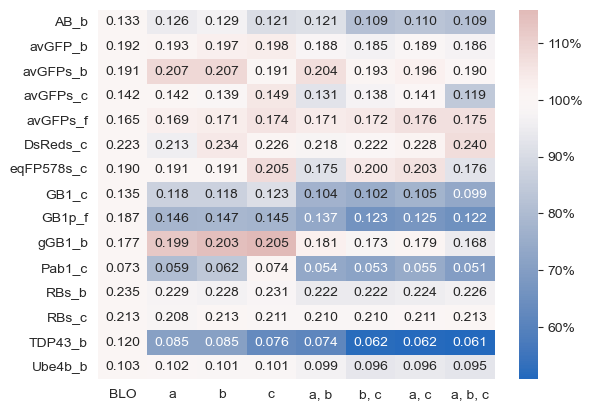

In [19]:
sns.heatmap(data_matrix * 100, annot=data, center=100, fmt=".3f", cmap="vlag", cbar_kws={'format': '%.0f%%'}, yticklabels=ycol, xticklabels=xcol)
plt.savefig("Fig/f2.tiff", dpi=600, bbox_inches="tight")
plt.show()
plt.close()